<a href="https://colab.research.google.com/github/IE-304/IE-304/blob/main/5.2_MLR_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
"""
Created on Sun Nov 10 23:02:46 2024

@author: @author: 元智大學工業工程與管理學系, 鄭春生 教授
"""
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

以隨機的方式，將一個資料集分成訓練檔和測試檔。適用於資料沒有時間性。

In [28]:
#Reading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/IE-304/IE-304/refs/heads/main/5.0_Advertising.csv")

In [29]:
# Machine Learning Approach
# Splitting the dataset
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.3, random_state = None)

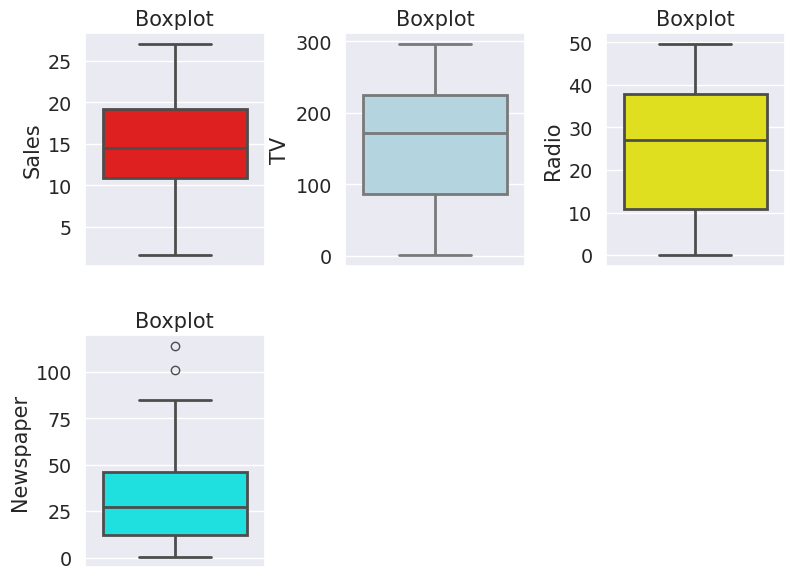

In [30]:
#Box plot- Training Data only
plt.figure(figsize=(8,6))
plt.subplots_adjust(top=1, right=1, hspace=0.3, wspace=0.45)
plt.subplot(2,3,1)
sns.boxplot(data=df_train, y="Sales", orient='v', color='red',linewidth=2, width=0.8).set(title='Boxplot')
plt.subplot(2,3,2)
sns.boxplot(data=df_train, y="TV", orient='v', color='lightblue',linewidth=2, width=0.8).set(title='Boxplot')
plt.subplot(2,3,3)
sns.boxplot(data=df_train, y="Radio", orient='v', color='yellow',linewidth=2, width=0.8).set(title='Boxplot')
plt.subplot(2,3,4)
sns.boxplot(data=df_train, y="Newspaper", orient='v', color='cyan',linewidth=2, width=0.8).set(title='Boxplot')
plt.show()

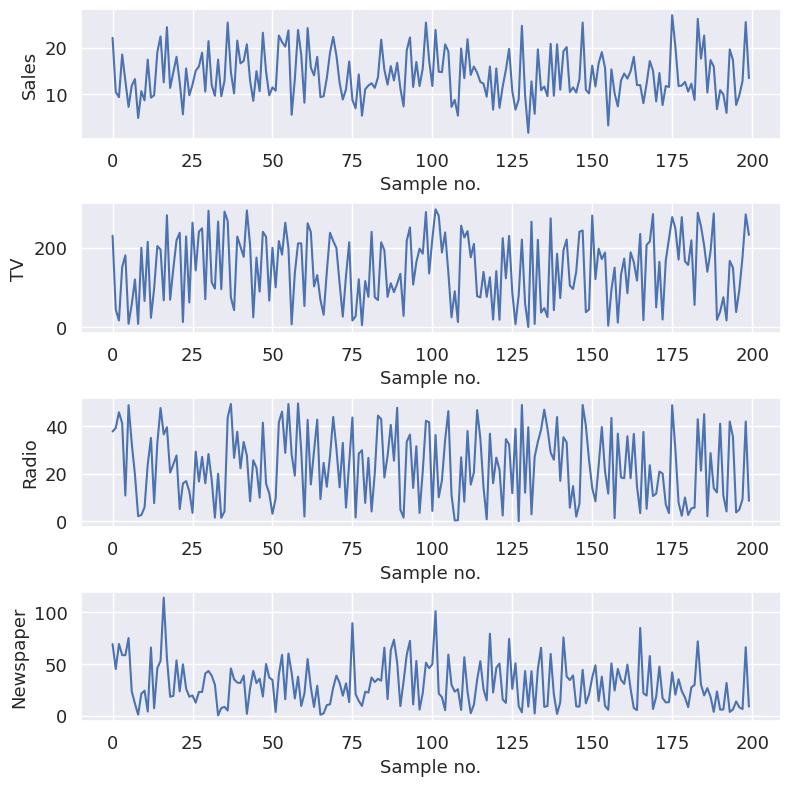

In [31]:
#Line Plot- For Whole Data
FS=13
plt.figure(figsize=(8,8))
plt.subplots_adjust(top=1, right=1, hspace=0.5, wspace=0.45)
plt.subplot(4,1,1)
plt.plot(df['Sales'])
plt.xticks(fontsize=FS)
plt.xlabel('Sample no.', fontsize=FS)
plt.yticks(fontsize=FS)
plt.ylabel('Sales', fontsize=FS)
plt.subplot(4,1,2)
plt.plot(df['TV'])
plt.xticks(fontsize=FS)
plt.xlabel('Sample no.', fontsize=FS)
plt.yticks(fontsize=FS)
plt.ylabel('TV', fontsize=FS)
plt.subplot(4,1,3)
plt.plot(df['Radio'])
plt.xticks(fontsize=FS)
plt.xlabel('Sample no.', fontsize=FS)
plt.yticks(fontsize=FS)
plt.ylabel('Radio', fontsize=FS)
plt.subplot(4,1,4)
plt.plot(df['Newspaper'])
plt.xticks(fontsize=FS)
plt.xlabel('Sample no.', fontsize=FS)
plt.yticks(fontsize=FS)
plt.ylabel('Newspaper', fontsize=FS)
plt.show()

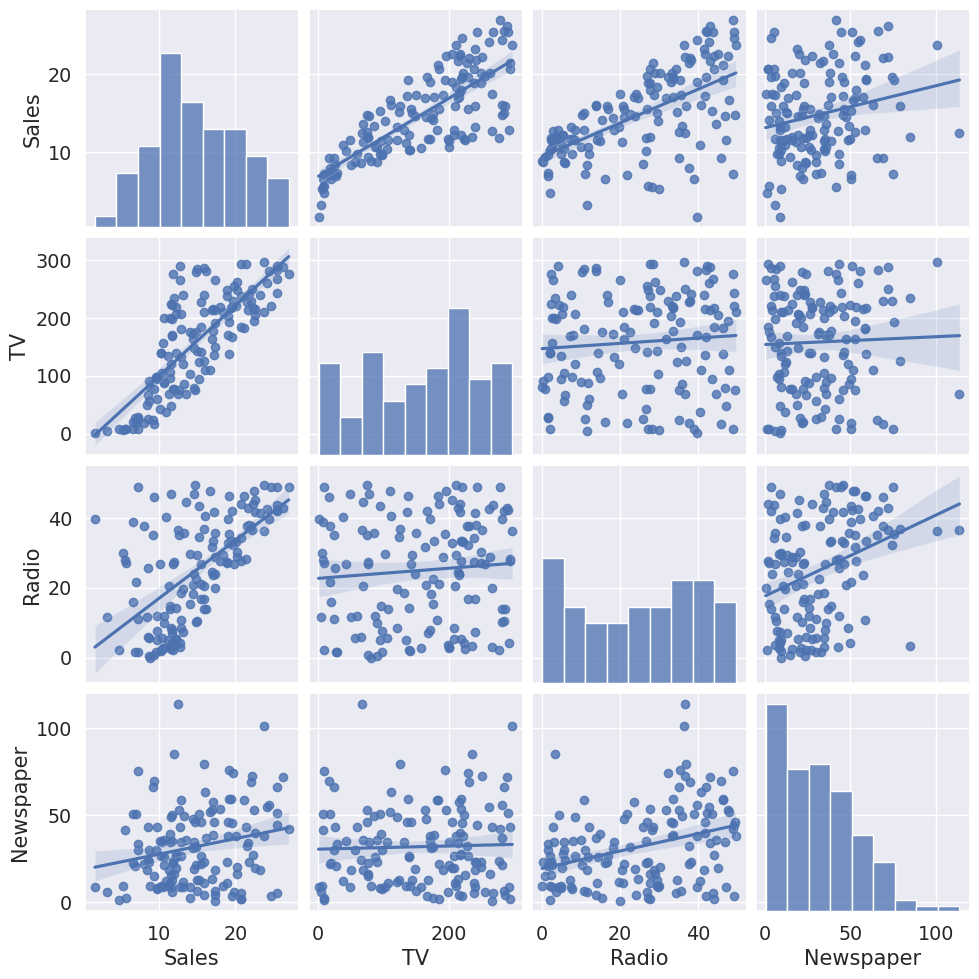

In [32]:
# Matrix plot
sns.pairplot(df_train[['Sales','TV', 'Radio', 'Newspaper']], kind='reg')
sns.set(font_scale=1.25)
plt.show()

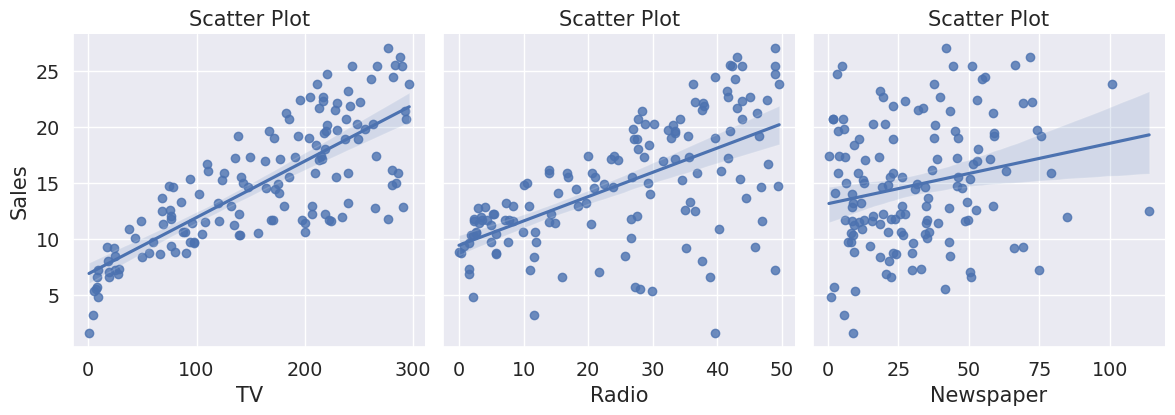

In [33]:
ax=sns.pairplot(df_train, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales',
                height=4, aspect=1.0, kind='reg')
ax.set(title='Scatter Plot')
plt.show()

In [34]:
# Print correlation coefficients
matrix = df_train.corr()
print("Correlation matrix is : ")
print(matrix.round(decimals=3))

Correlation matrix is : 
            Unnamed: 0     TV  Radio  Newspaper  Sales
Unnamed: 0       1.000  0.037 -0.113     -0.097 -0.034
TV               0.037  1.000  0.082      0.035  0.782
Radio           -0.113  0.082  1.000      0.340  0.600
Newspaper       -0.097  0.035  0.340      1.000  0.219
Sales           -0.034  0.782  0.600      0.219  1.000


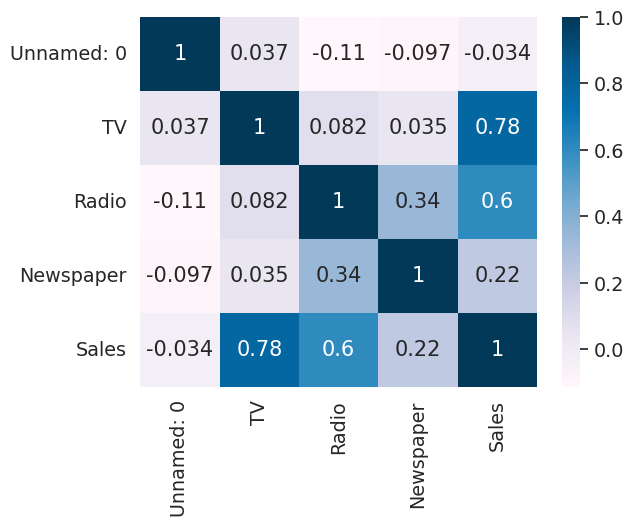

In [35]:
# Plotting correlation matrix
sns.heatmap(matrix, cmap="PuBu", annot=True) #Blues, Greens
# Display the plot
plt.show()

In [36]:
# 只用一次項
X_train = df_train[['TV', 'Radio', 'Newspaper']]
y_train = df_train['Sales']
X_test = df_test[['TV', 'Radio', 'Newspaper']]
y_test = df_test['Sales']

In [37]:
#加入交互作用
'''
df_train['TVRadio']= df_train['TV']*df_train['Radio']
X_train = df_train[['TV', 'Radio', 'Newspaper', 'TVRadio']]
df_test['TVRadio']= df_test['TV']*df_test['Radio']
X_test = df_test[['TV', 'Radio', 'Newspaper', 'TVRadio']]
y_train = df_train['Sales']
y_test = df_test['Sales']
'''

"\ndf_train['TVRadio']= df_train['TV']*df_train['Radio']\nX_train = df_train[['TV', 'Radio', 'Newspaper', 'TVRadio']]\ndf_test['TVRadio']= df_test['TV']*df_test['Radio']\nX_test = df_test[['TV', 'Radio', 'Newspaper', 'TVRadio']]\ny_train = df_train['Sales']\ny_test = df_test['Sales']\n"

In [38]:
#Fitting the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
#Prediction of test set
y_pred= model.predict(X_test)

In [40]:
#Predicted values
print("Prediction for test set:\n{}".format(y_pred))
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
mlr_diff.head()

Prediction for test set:
[10.21583999  9.81550173 15.2943286  11.18645626 14.90236803 11.83623331
  9.56610222 13.63502514 17.73215756  3.16259383 14.65871657 14.8407043
 12.2315845  17.29440632 18.63481758 15.09022715 12.61628265 11.71536546
  5.37697993  9.44885019  7.8385817  12.2356201  16.817012   10.10804492
 16.9768396  16.36122965  4.0893595   8.65905953 11.53618919  7.93145765
 14.70303905 12.60692907 11.22119103  7.22475173  6.2322831   9.7187139
  9.98364133  9.0253585  10.81429642 14.68398255  8.9501374  11.79401979
  9.20261105 21.12877378  7.47117861 12.24293022 15.4121595   8.08336531
 13.66626509 17.86490072  4.9605208   7.26264133 21.55220661 10.45563998
 15.59178917 16.40013436 11.89626288  5.68784097 16.31531139  9.50458967]


,Actual value,Predicted value
158,7.3,10.215840
157,10.1,9.815502
85,15.2,15.294329
136,9.5,11.186456
162,14.9,14.902368


In [41]:
#Model Evaluation
R2score = r2_score(y_test, y_pred)
R2score1 = model.score(X_test, y_test)
R2score2 = explained_variance_score(y_test, y_pred, force_finite=False)
meanAbErr = mean_absolute_error(y_test, y_pred)
meanSqErr = mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(mean_squared_error(y_test, y_pred))
print('R squared: %.3f' %R2score)
print('R squared1: %.3f' %R2score1)
print('R squared2: %.3f' %R2score2)
print('Mean Absolute Error: %.4f' %meanAbErr)
print('Mean Square Error: %.4f' %meanSqErr)
print('Root Mean Square Error: %.4f' %rootMeanSqErr)

R squared: 0.830
R squared1: 0.830
R squared2: 0.833
Mean Absolute Error: 1.2796
Mean Square Error: 2.3626
Root Mean Square Error: 1.5371


In [42]:
y_pred= model.predict(X_test)
sample_no=len(y_pred)
LW=2; FS=16

In [43]:
residual=y_test-y_pred
residual.reset_index(drop=True, inplace=True)

Residual:0.227


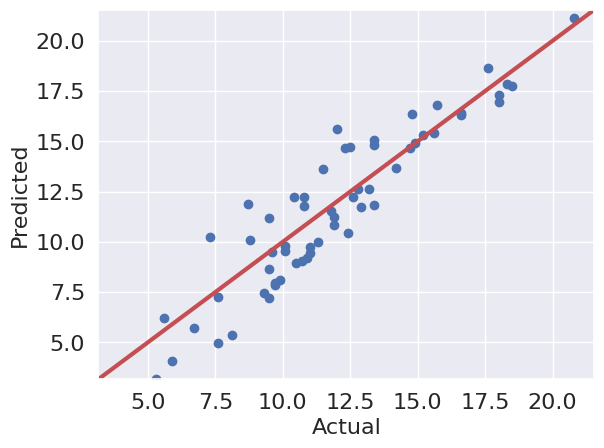

In [44]:
print('Residual:%.3f' %residual.mean()) # residual 的平均數
linestart=y_pred.min()
lineend=y_pred.max()
plt.scatter(y_test, y_pred)
plt.plot([linestart, lineend], [linestart, lineend], color='r', lw=3)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
plt.xlim(linestart, lineend)
plt.ylim(linestart, lineend)
plt.xlabel('Actual', fontsize=FS)
plt.ylabel('Predicted', fontsize=FS)
plt.show()

In [45]:
# Normality test of residuals using Anderson-Darling test
import statsmodels.api as sm
[AD2, pvalue]=sm.stats.diagnostic.normal_ad(residual)
print('\nAnderson Darling test statistic: %.4f' % AD2)
print ('P-Value: %.4f' % pvalue)


Anderson Darling test statistic: 0.9526
P-Value: 0.0150


In [46]:
# Residual Plot Four-in-One
from scipy.stats import probplot

In [47]:
plt.figure(figsize=(10,8))
plt.subplots_adjust(top=0.9, right=1, hspace=0.5, wspace=0.3)
plt.suptitle('Residual Plots', fontsize=FS+2)

Text(0.5, 0.98, 'Residual Plots')

<Figure size 1000x800 with 0 Axes>

Text(0, 0.5, 'Residuals')

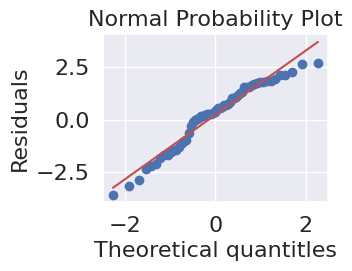

In [48]:
plt.subplot(2,2,1)
rawdata=np.array(residual, dtype=float)
probplot(rawdata, dist='norm', fit=True, plot=plt)
plt.title('Normal Probability Plot', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
plt.xlabel('Theoretical quantitles', fontsize=FS)
plt.ylabel('Residuals', fontsize=FS)

Text(0, 0.5, 'Residual')

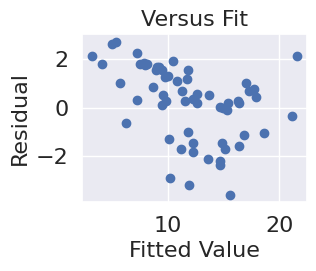

In [49]:
plt.subplot(2,2,2)
plt.scatter(y_pred, residual)
plt.title('Versus Fit', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
plt.xlabel('Fitted Value', fontsize=FS)
plt.ylabel('Residual', fontsize=FS)

Text(0, 0.5, 'Frequency')

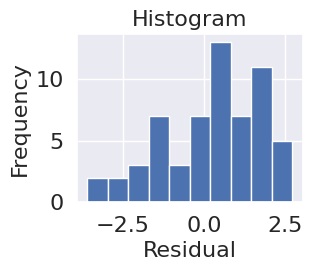

In [50]:
plt.subplot(2,2,3)
plt.hist(residual)
plt.title('Histogram', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
plt.xlabel('Residual', fontsize=FS)
plt.ylabel('Frequency', fontsize=FS)

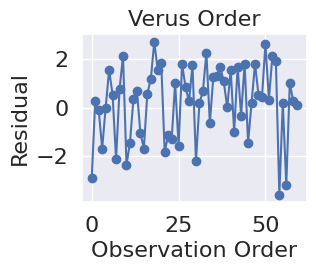

In [51]:
plt.subplot(2,2,4)
#index = np.linspace(0,59)
plt.plot(residual, 'b-o')
plt.title('Verus Order', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
plt.xlabel('Observation Order', fontsize=FS)
plt.ylabel('Residual', fontsize=FS)
plt.show()